In [4]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [20]:
## 데이터 길이 맞추기(7초) - 01. cut

for k in range(1,101):
    data_url = 'D:/Data/ECGDB/' + str(k)
    save_url = "D:/Data/ECGDB_preprocessing/01. cut/" + str(k)
    os.mkdir(save_url)
    
    for i in range(1,61):
    
        file = pd.read_csv(data_url + "/{0}.csv".format(i), header=None)
        ECG_cut1 = file.iloc[:350000]
#         print(ECG_cut1)
        ECG_cut1.to_csv(save_url + "/cut_{0}.csv".format(i))

In [16]:
## 다운 샘플링 진행(50만 -> 256hz) - 02. down_sampling

for k in range(64,65):
    data_url = 'D:/Data/ECGDB_preprocessing/01. cut/' + str(k)
    save_url = "D:/Data/ECGDB_preprocessing/02. down_sampling/" + str(k)
#     os.mkdir(save_url)
    
    for i in range(10,61):
    
        file = pd.read_csv(data_url + "/cut_{0}.csv".format(i), header=None)
        ECG_down = pd.DataFrame([file[2][j] for j in range(1,350000,136)])
        ECG_down.to_csv(save_url + "/down_sampling_{0}.csv".format(i))

In [17]:
## 밴드패스 필터 통과 - 03. Band_pass

for k in range(1,101):
    data_url = 'D:/Data/ECGDB_preprocessing/02. down_sampling/' + str(k)
    save_url = "D:/Data/ECGDB_preprocessing/03. Band_pass/" + str(k)
    os.mkdir(save_url)
    
    for i in range(1,61):

        file = (data_url + "/down_sampling_{0}.csv".format(i))

        ECG_bp = pd.read_csv(file, header=0)
        ECG_bpp = ECG_bp.transpose()

        test = []

        ECG_1= ECG_bpp.iloc[1]
        ECG_bandpass = hp.filter_signal(ECG_1, cutoff=[0.01, 50], sample_rate=500.0, order=3, filtertype='bandpass')
        test.append(ECG_bandpass)

        test = pd.DataFrame(test).transpose()
        pd.DataFrame(test).to_csv(save_url + "/ECG_bandpass_{0}.csv".format(i))
    
        
#     plt.savefig('D:/Data/ECGDB/ECG_bandpass/ECG_band_{0}.jpg'.format(i))

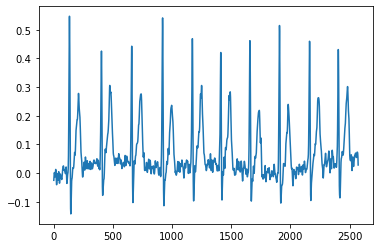

In [3]:
## 데이터 확인

ECG_bp = pd.read_csv('D:/Data/ECGDB_preprocessing/03. Band_pass/64/ECG_bandpass_10.csv')

# ECG_bpp = ECG_bp.transpose()
plt.plot(ECG_bp.iloc[:,1])

In [6]:
## train, test 데이터 분리(train 40, test 20)

for k in range(1,100):
    data_url = 'D:/Data/ECGDB_preprocessing/03. Band_pass/' + str(k)
    
    for i in range(1,61):
        
        file = (data_url + "/ECG_bandpass_{0}.csv".format(i))
        dataset = pd.read_csv(file, header=0)
        
        
        # train_test_split
        x_train,y_train = train_test_split(dataset, test_size=0.15, shuffle=True, random_state=34)
        
        print(x_train)

      Unnamed: 0         0
2211        2211  0.014819
533          533  0.297619
1429        1429  0.041252
2300        2300  0.492083
482          482  0.086616
...          ...       ...
1571        1571  0.081632
324          324  0.034775
1897        1897  0.004973
2538        2538 -0.019946
1146        1146  0.096392

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.017409
533          533 -0.016924
1429        1429  0.427203
2300        2300  0.051836
482          482 -0.039140
...          ...       ...
1571        1571  0.006415
324          324  0.075270
1897        1897 -0.014137
2538        2538 -0.049848
1146        1146 -0.058134

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.126985
533          533  0.489547
1429        1429  0.094362
2300        2300  0.242020
482          482  0.158140
...          ...       ...
1571        1571  0.200883
324          324  0.087449
1897        1897  0.167664
2538        2538  0.370139
1146 

      Unnamed: 0         0
2211        2211  0.015593
533          533  0.116955
1429        1429  0.312534
2300        2300  0.125008
482          482  0.097629
...          ...       ...
1571        1571  0.100353
324          324  0.310657
1897        1897  0.071289
2538        2538  0.090010
1146        1146  0.045299

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.051848
533          533 -0.133127
1429        1429 -0.044988
2300        2300  0.017208
482          482  0.261797
...          ...       ...
1571        1571  0.016913
324          324  0.032385
1897        1897  0.015914
2538        2538 -0.089431
1146        1146  0.053230

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.180477
533          533 -0.210723
1429        1429 -0.140334
2300        2300 -0.120680
482          482 -0.245913
...          ...       ...
1571        1571 -0.087722
324          324 -0.155629
1897        1897 -0.114358
2538        2538  0.105281
1146 

      Unnamed: 0         0
2211        2211 -0.035637
533          533  0.037824
1429        1429  0.048751
2300        2300  0.254216
482          482  0.066953
...          ...       ...
1571        1571 -0.001081
324          324  0.050369
1897        1897  0.011311
2538        2538 -0.005706
1146        1146  0.017981

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.021649
533          533  0.029331
1429        1429  0.019131
2300        2300 -0.009193
482          482  0.047516
...          ...       ...
1571        1571  0.081814
324          324  0.049127
1897        1897  0.038298
2538        2538 -0.029628
1146        1146 -0.018893

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.008458
533          533 -0.162148
1429        1429 -0.100388
2300        2300 -0.014633
482          482 -0.171334
...          ...       ...
1571        1571 -0.030060
324          324 -0.168332
1897        1897 -0.033141
2538        2538  0.053145
1146 

      Unnamed: 0         0
2211        2211 -0.615869
533          533 -0.126259
1429        1429 -0.078327
2300        2300 -0.225971
482          482 -0.470457
...          ...       ...
1571        1571 -0.308121
324          324 -0.237498
1897        1897 -0.365080
2538        2538 -0.304764
1146        1146 -0.008029

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.067515
533          533 -0.077648
1429        1429  0.057164
2300        2300  0.360247
482          482  0.172026
...          ...       ...
1571        1571  0.127644
324          324 -0.065510
1897        1897  0.122710
2538        2538  0.088694
1146        1146  0.020764

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.136198
533          533  0.083625
1429        1429 -0.067541
2300        2300 -0.061693
482          482 -0.054686
...          ...       ...
1571        1571 -0.296804
324          324 -0.091261
1897        1897  0.029538
2538        2538 -0.002336
1146 

      Unnamed: 0         0
2211        2211  0.222475
533          533  0.166808
1429        1429  0.417044
2300        2300  0.217825
482          482  0.135970
...          ...       ...
1571        1571  0.144069
324          324  0.148498
1897        1897  1.068977
2538        2538  0.518432
1146        1146  0.244425

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.868020
533          533 -0.574486
1429        1429 -0.684179
2300        2300 -0.864085
482          482 -0.546391
...          ...       ...
1571        1571 -0.759315
324          324  0.369372
1897        1897 -0.791545
2538        2538 -0.984364
1146        1146 -0.639358

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.023890
533          533  0.040813
1429        1429  0.075681
2300        2300 -0.012327
482          482  0.003514
...          ...       ...
1571        1571  0.076899
324          324  0.053438
1897        1897 -0.015486
2538        2538  0.000513
1146 

      Unnamed: 0         0
2211        2211 -0.026040
533          533 -0.207750
1429        1429 -0.104354
2300        2300 -0.011249
482          482 -0.212862
...          ...       ...
1571        1571 -0.083079
324          324  0.017429
1897        1897  0.289105
2538        2538 -0.021617
1146        1146 -0.098119

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.135296
533          533  0.010951
1429        1429 -0.127329
2300        2300 -0.141509
482          482  0.088882
...          ...       ...
1571        1571 -0.140005
324          324 -0.065637
1897        1897 -0.197398
2538        2538 -0.084367
1146        1146  0.065495

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.011980
533          533  0.157278
1429        1429  0.138618
2300        2300  0.026845
482          482  0.173631
...          ...       ...
1571        1571  0.052648
324          324  0.132248
1897        1897  0.030402
2538        2538 -0.009165
1146 

      Unnamed: 0         0
2211        2211 -0.053184
533          533 -0.006684
1429        1429  0.377809
2300        2300  0.171899
482          482  0.126105
...          ...       ...
1571        1571  0.116464
324          324  0.454284
1897        1897  0.108738
2538        2538  0.476095
1146        1146  0.431336

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.020393
533          533 -0.302588
1429        1429 -0.097560
2300        2300  0.004125
482          482 -0.270901
...          ...       ...
1571        1571 -0.148027
324          324 -0.167599
1897        1897 -0.074266
2538        2538  0.291440
1146        1146 -0.200252

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.213438
533          533 -0.042832
1429        1429  0.239858
2300        2300  0.003847
482          482 -0.008945
...          ...       ...
1571        1571  0.017129
324          324  0.328930
1897        1897 -0.448187
2538        2538 -0.026783
1146 

      Unnamed: 0         0
2211        2211 -0.034140
533          533  0.027687
1429        1429  0.097329
2300        2300  0.098911
482          482  0.178489
...          ...       ...
1571        1571 -0.008850
324          324  0.035445
1897        1897  0.096135
2538        2538  0.004435
1146        1146  0.025648

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.018382
533          533  0.068102
1429        1429  0.071395
2300        2300  0.024870
482          482  0.028725
...          ...       ...
1571        1571 -0.004948
324          324  0.124938
1897        1897  0.096598
2538        2538 -0.065712
1146        1146  0.143813

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.023205
533          533 -0.011786
1429        1429  0.021770
2300        2300  0.111669
482          482 -0.000986
...          ...       ...
1571        1571 -0.021003
324          324  0.102362
1897        1897  0.075924
2538        2538 -0.017431
1146 

      Unnamed: 0         0
2211        2211 -0.088929
533          533  0.036594
1429        1429 -0.057966
2300        2300 -0.008978
482          482 -0.066808
...          ...       ...
1571        1571  0.335863
324          324 -0.008986
1897        1897 -0.084310
2538        2538 -0.070744
1146        1146 -0.038694

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.118062
533          533  0.132826
1429        1429  0.063576
2300        2300  0.282735
482          482  0.284908
...          ...       ...
1571        1571  0.122182
324          324  0.094306
1897        1897 -0.093644
2538        2538  0.121802
1146        1146  0.056385

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.052595
533          533  0.097933
1429        1429  0.073420
2300        2300  0.055407
482          482  0.357750
...          ...       ...
1571        1571 -0.139767
324          324  0.097737
1897        1897  0.086914
2538        2538  0.028541
1146 

      Unnamed: 0         0
2211        2211 -0.008553
533          533 -0.551116
1429        1429 -0.027652
2300        2300  0.057435
482          482 -0.134120
...          ...       ...
1571        1571  0.077342
324          324 -0.073893
1897        1897  0.045065
2538        2538  0.030665
1146        1146 -0.068747

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.007958
533          533 -0.098049
1429        1429 -0.010763
2300        2300 -0.184856
482          482 -0.065548
...          ...       ...
1571        1571 -0.000078
324          324  0.060915
1897        1897 -0.015181
2538        2538  0.018189
1146        1146 -0.044318

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.113597
533          533  0.214670
1429        1429  0.028361
2300        2300  0.036058
482          482  0.118197
...          ...       ...
1571        1571  0.087961
324          324  0.054323
1897        1897  0.137626
2538        2538  0.191864
1146 

      Unnamed: 0         0
2211        2211  0.267957
533          533  0.115915
1429        1429  0.273424
2300        2300  0.322160
482          482  0.132307
...          ...       ...
1571        1571  0.146360
324          324  0.439191
1897        1897  0.189556
2538        2538  0.204601
1146        1146  0.377215

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.034460
533          533  0.329047
1429        1429  0.089057
2300        2300  0.151044
482          482  0.032995
...          ...       ...
1571        1571 -0.075272
324          324  0.246037
1897        1897 -0.041423
2538        2538  0.084749
1146        1146  0.160670

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.566760
533          533  0.571027
1429        1429 -0.037084
2300        2300 -0.035095
482          482  0.110668
...          ...       ...
1571        1571  0.115818
324          324 -0.007894
1897        1897  0.091587
2538        2538 -0.057648
1146 

      Unnamed: 0         0
2211        2211 -0.026742
533          533  0.054837
1429        1429 -0.000532
2300        2300 -0.061058
482          482 -0.026685
...          ...       ...
1571        1571 -0.038411
324          324 -0.032067
1897        1897 -0.032472
2538        2538 -0.047045
1146        1146  0.109062

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.044105
533          533 -0.281572
1429        1429  0.021448
2300        2300 -0.038353
482          482 -0.060823
...          ...       ...
1571        1571 -0.014765
324          324  0.229724
1897        1897 -0.021170
2538        2538 -0.015955
1146        1146  0.076558

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.101866
533          533 -0.071598
1429        1429  0.006109
2300        2300  0.045584
482          482 -0.053350
...          ...       ...
1571        1571  0.055732
324          324  0.224719
1897        1897  0.160115
2538        2538  0.261225
1146 

      Unnamed: 0         0
2211        2211  0.081917
533          533  0.184640
1429        1429  0.198686
2300        2300  0.092417
482          482  0.129358
...          ...       ...
1571        1571  0.024610
324          324  0.062940
1897        1897  0.044713
2538        2538  0.062598
1146        1146  0.226369

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.347655
533          533 -0.239040
1429        1429 -0.262856
2300        2300 -0.455153
482          482 -0.138672
...          ...       ...
1571        1571 -0.122172
324          324 -0.132868
1897        1897 -0.233442
2538        2538 -0.289586
1146        1146 -0.222040

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.005544
533          533  0.089873
1429        1429  0.101237
2300        2300 -0.021015
482          482  0.097298
...          ...       ...
1571        1571  0.120724
324          324  0.171888
1897        1897  0.018338
2538        2538  0.005226
1146 

      Unnamed: 0         0
2211        2211  0.074562
533          533 -0.097939
1429        1429 -0.008425
2300        2300  0.139473
482          482 -0.113749
...          ...       ...
1571        1571  0.019437
324          324  0.075937
1897        1897  0.236014
2538        2538  0.135537
1146        1146  0.128277

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.054441
533          533 -0.117134
1429        1429 -0.030513
2300        2300 -0.132613
482          482 -0.060302
...          ...       ...
1571        1571 -0.130192
324          324 -0.105074
1897        1897 -0.054559
2538        2538 -0.155236
1146        1146 -0.127389

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.014114
533          533  0.015894
1429        1429 -0.021143
2300        2300  0.007068
482          482  0.012005
...          ...       ...
1571        1571  0.393843
324          324  0.113548
1897        1897  0.234490
2538        2538 -0.040018
1146 

      Unnamed: 0         0
2211        2211 -0.049887
533          533 -0.028706
1429        1429 -0.035178
2300        2300 -0.072467
482          482 -0.317239
...          ...       ...
1571        1571  0.055879
324          324 -0.088153
1897        1897 -0.089541
2538        2538 -0.068189
1146        1146 -0.032101

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.141782
533          533  0.013822
1429        1429  0.125973
2300        2300  0.038295
482          482  0.002510
...          ...       ...
1571        1571  0.038423
324          324  0.086264
1897        1897 -0.074100
2538        2538  0.013563
1146        1146  0.053408

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.210292
533          533  0.061484
1429        1429  0.031069
2300        2300  0.157421
482          482  0.175203
...          ...       ...
1571        1571  0.014496
324          324  0.035417
1897        1897  0.055101
2538        2538  0.248930
1146 

      Unnamed: 0         0
2211        2211 -0.696324
533          533 -0.535143
1429        1429 -0.775074
2300        2300 -0.240686
482          482 -0.505613
...          ...       ...
1571        1571 -0.430223
324          324 -0.536375
1897        1897 -0.756843
2538        2538 -1.070179
1146        1146 -0.704689

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.254654
533          533  0.264754
1429        1429  0.401886
2300        2300  0.292697
482          482  0.260911
...          ...       ...
1571        1571  0.434632
324          324  0.279068
1897        1897  0.250223
2538        2538  0.334520
1146        1146  0.329577

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.231063
533          533 -0.138759
1429        1429 -0.230582
2300        2300 -0.088095
482          482 -0.172359
...          ...       ...
1571        1571 -0.193376
324          324 -0.233284
1897        1897 -0.180529
2538        2538 -0.205583
1146 

      Unnamed: 0         0
2211        2211 -0.025026
533          533 -0.035082
1429        1429 -0.019167
2300        2300 -0.016725
482          482  0.036030
...          ...       ...
1571        1571  0.128417
324          324 -0.025604
1897        1897  0.075868
2538        2538 -0.022809
1146        1146 -0.043856

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.069627
533          533 -0.068446
1429        1429 -0.067066
2300        2300 -0.051367
482          482 -0.086155
...          ...       ...
1571        1571  0.031163
324          324 -0.083284
1897        1897  0.070882
2538        2538 -0.043326
1146        1146 -0.074502

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.081433
533          533 -0.112216
1429        1429 -0.122196
2300        2300 -0.062710
482          482 -0.083862
...          ...       ...
1571        1571 -0.078635
324          324 -0.048380
1897        1897 -0.115962
2538        2538 -0.088471
1146 

      Unnamed: 0         0
2211        2211 -0.258447
533          533 -0.239291
1429        1429 -0.246156
2300        2300 -0.127329
482          482 -0.170982
...          ...       ...
1571        1571 -0.282085
324          324 -0.372095
1897        1897 -0.256327
2538        2538 -0.213304
1146        1146 -0.182153

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.096558
533          533 -0.040598
1429        1429 -0.036078
2300        2300  0.003173
482          482  0.259728
...          ...       ...
1571        1571 -0.038847
324          324 -0.179325
1897        1897 -0.105585
2538        2538  0.324941
1146        1146 -0.110463

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.419843
533          533 -0.255272
1429        1429 -0.256577
2300        2300 -0.332858
482          482 -0.100582
...          ...       ...
1571        1571 -0.260249
324          324 -0.251547
1897        1897 -0.388689
2538        2538 -0.355900
1146 

      Unnamed: 0         0
2211        2211 -0.000293
533          533 -0.122199
1429        1429 -0.080852
2300        2300  0.022942
482          482 -0.110214
...          ...       ...
1571        1571 -0.039962
324          324 -0.137682
1897        1897 -0.037518
2538        2538  0.027096
1146        1146  0.182046

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.188568
533          533 -0.208370
1429        1429 -0.268752
2300        2300 -0.289633
482          482 -0.196885
...          ...       ...
1571        1571 -0.268280
324          324 -0.188028
1897        1897 -0.287245
2538        2538 -0.270694
1146        1146 -0.245859

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.036137
533          533  0.156261
1429        1429 -0.028744
2300        2300 -0.025340
482          482 -0.049594
...          ...       ...
1571        1571 -0.012570
324          324 -0.034687
1897        1897 -0.047013
2538        2538 -0.026305
1146 

      Unnamed: 0         0
2211        2211  0.531414
533          533 -0.269725
1429        1429 -0.305682
2300        2300  0.080788
482          482 -0.277461
...          ...       ...
1571        1571 -0.226468
324          324 -0.196052
1897        1897 -0.092600
2538        2538 -0.202438
1146        1146 -0.269118

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.103993
533          533 -0.524799
1429        1429 -0.056963
2300        2300  0.063615
482          482 -0.551593
...          ...       ...
1571        1571 -0.211932
324          324 -0.460240
1897        1897 -0.195207
2538        2538 -0.012176
1146        1146 -0.283159

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.020645
533          533 -0.005795
1429        1429 -0.065415
2300        2300 -0.029359
482          482 -0.043197
...          ...       ...
1571        1571  0.027874
324          324  0.261483
1897        1897  0.222445
2538        2538 -0.024973
1146 

      Unnamed: 0         0
2211        2211  0.034879
533          533 -0.100574
1429        1429 -0.091916
2300        2300 -0.032396
482          482 -0.044628
...          ...       ...
1571        1571 -0.106370
324          324 -0.138494
1897        1897 -0.054424
2538        2538 -0.042932
1146        1146 -0.094784

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.013084
533          533 -0.026348
1429        1429 -0.015970
2300        2300  0.005811
482          482 -0.024377
...          ...       ...
1571        1571  0.095765
324          324 -0.032786
1897        1897 -0.036902
2538        2538 -0.000938
1146        1146 -0.026493

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.042742
533          533  0.002426
1429        1429  0.029646
2300        2300  0.043691
482          482  0.134220
...          ...       ...
1571        1571  0.090516
324          324 -0.009449
1897        1897  0.015959
2538        2538  0.018869
1146 

      Unnamed: 0         0
2211        2211  0.017749
533          533  0.099803
1429        1429  0.025627
2300        2300  0.030230
482          482  0.108811
...          ...       ...
1571        1571  0.286944
324          324  0.075839
1897        1897  0.075612
2538        2538  0.045395
1146        1146  0.053219

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.037372
533          533 -0.213192
1429        1429 -0.213134
2300        2300 -0.083952
482          482 -0.187135
...          ...       ...
1571        1571 -0.115083
324          324 -0.143969
1897        1897 -0.085998
2538        2538  0.005035
1146        1146 -0.150552

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.232531
533          533 -0.151485
1429        1429 -0.094682
2300        2300 -0.012284
482          482 -0.153149
...          ...       ...
1571        1571  0.171749
324          324  0.100987
1897        1897  0.205043
2538        2538  0.201331
1146 

      Unnamed: 0         0
2211        2211 -0.147659
533          533  0.003771
1429        1429 -0.103428
2300        2300 -0.182506
482          482  0.302486
...          ...       ...
1571        1571 -0.080691
324          324 -0.005372
1897        1897 -0.120393
2538        2538 -0.219022
1146        1146 -0.093469

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.119068
533          533 -0.073719
1429        1429  0.111342
2300        2300  0.025324
482          482  0.124492
...          ...       ...
1571        1571  0.021664
324          324 -0.083463
1897        1897  0.376814
2538        2538 -0.004909
1146        1146 -0.092780

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.156582
533          533  0.062604
1429        1429 -0.202529
2300        2300 -0.155706
482          482 -0.169323
...          ...       ...
1571        1571 -0.205792
324          324 -0.129291
1897        1897 -0.226728
2538        2538 -0.208114
1146 

      Unnamed: 0         0
2211        2211  0.344425
533          533  0.144756
1429        1429  0.227599
2300        2300  0.479605
482          482  0.180418
...          ...       ...
1571        1571  0.258616
324          324  0.209406
1897        1897  0.385127
2538        2538  0.361963
1146        1146  0.559729

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.274326
533          533 -0.198868
1429        1429 -0.010081
2300        2300  0.072625
482          482  0.148762
...          ...       ...
1571        1571 -0.084636
324          324 -0.201789
1897        1897  0.427012
2538        2538  0.086442
1146        1146  0.136338

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.083056
533          533  0.228843
1429        1429 -0.056448
2300        2300 -0.044114
482          482 -0.085596
...          ...       ...
1571        1571  0.050933
324          324 -0.067760
1897        1897 -0.087193
2538        2538 -0.536157
1146 

      Unnamed: 0         0
2211        2211  0.104196
533          533  0.043322
1429        1429  0.541896
2300        2300  0.095179
482          482  0.039519
...          ...       ...
1571        1571  0.082984
324          324  0.098156
1897        1897  0.065889
2538        2538  0.365169
1146        1146  0.091373

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.471657
533          533  0.185788
1429        1429  0.417792
2300        2300  1.258013
482          482  0.195016
...          ...       ...
1571        1571  0.434871
324          324 -0.111352
1897        1897  0.448058
2538        2538  0.519505
1146        1146  0.302199

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.333384
533          533  0.080320
1429        1429  0.086767
2300        2300  0.069084
482          482  0.061563
...          ...       ...
1571        1571  0.769768
324          324  0.263316
1897        1897  0.055799
2538        2538  0.030609
1146 

      Unnamed: 0         0
2211        2211 -0.132029
533          533 -0.258175
1429        1429 -0.138622
2300        2300 -0.073723
482          482 -0.007693
...          ...       ...
1571        1571  0.110711
324          324 -0.228820
1897        1897 -0.148778
2538        2538  0.247187
1146        1146 -0.157681

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.605387
533          533 -0.005301
1429        1429  0.089745
2300        2300  0.315752
482          482 -0.033385
...          ...       ...
1571        1571 -0.012411
324          324  0.255133
1897        1897  0.049488
2538        2538  0.104119
1146        1146  0.240917

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.249845
533          533  0.167827
1429        1429 -0.135083
2300        2300  0.099849
482          482  0.026559
...          ...       ...
1571        1571 -0.176824
324          324 -0.071928
1897        1897  0.372679
2538        2538 -0.109040
1146 

      Unnamed: 0         0
2211        2211  0.084564
533          533 -0.067199
1429        1429  0.029261
2300        2300 -0.005350
482          482  0.223661
...          ...       ...
1571        1571 -0.220614
324          324 -0.040902
1897        1897  0.133706
2538        2538  0.063287
1146        1146  0.036402

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.046120
533          533 -0.145651
1429        1429 -0.137515
2300        2300 -0.028770
482          482 -0.121364
...          ...       ...
1571        1571  0.051819
324          324 -0.090115
1897        1897 -0.077706
2538        2538 -0.062817
1146        1146 -0.126417

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.409997
533          533  0.024369
1429        1429 -0.005368
2300        2300 -0.154456
482          482 -0.118802
...          ...       ...
1571        1571 -0.166156
324          324 -0.227808
1897        1897 -0.234189
2538        2538 -0.223348
1146 

      Unnamed: 0         0
2211        2211 -0.010524
533          533  0.474528
1429        1429  0.356798
2300        2300 -0.086152
482          482 -0.010785
...          ...       ...
1571        1571 -0.003595
324          324  0.136778
1897        1897 -0.018250
2538        2538  0.094172
1146        1146  0.294888

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.035260
533          533  0.036016
1429        1429 -0.025001
2300        2300 -0.062714
482          482  0.534214
...          ...       ...
1571        1571 -0.010585
324          324 -0.112637
1897        1897  0.338167
2538        2538 -0.019161
1146        1146 -0.060547

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.247715
533          533 -0.181821
1429        1429 -0.120297
2300        2300 -0.311639
482          482 -0.163270
...          ...       ...
1571        1571 -0.263042
324          324 -0.119775
1897        1897 -0.229578
2538        2538 -0.323786
1146 

      Unnamed: 0         0
2211        2211 -0.232732
533          533 -0.133612
1429        1429 -0.213816
2300        2300 -0.149400
482          482 -0.120008
...          ...       ...
1571        1571 -0.209669
324          324 -0.100157
1897        1897 -0.213796
2538        2538 -0.251964
1146        1146 -0.112393

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.147008
533          533 -0.409669
1429        1429 -0.342372
2300        2300 -0.107559
482          482 -0.399614
...          ...       ...
1571        1571 -0.293814
324          324 -0.242957
1897        1897 -0.296809
2538        2538 -0.201377
1146        1146 -0.410613

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.083894
533          533  0.023373
1429        1429  0.083365
2300        2300  0.028767
482          482  0.029503
...          ...       ...
1571        1571  0.054841
324          324  0.051406
1897        1897  0.305583
2538        2538  0.039509
1146 

      Unnamed: 0         0
2211        2211 -0.086926
533          533 -0.523750
1429        1429 -0.529970
2300        2300 -0.008324
482          482 -0.505420
...          ...       ...
1571        1571 -0.552930
324          324 -0.613897
1897        1897 -0.134454
2538        2538 -0.317601
1146        1146 -0.253983

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.358541
533          533 -0.112632
1429        1429  0.203961
2300        2300 -0.014865
482          482  0.110750
...          ...       ...
1571        1571  0.316545
324          324 -0.021927
1897        1897  0.142260
2538        2538  0.053907
1146        1146  0.523007

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.026991
533          533  0.365275
1429        1429  0.528632
2300        2300  0.150205
482          482  0.298726
...          ...       ...
1571        1571  0.547221
324          324  0.431819
1897        1897  0.240466
2538        2538  0.460011
1146 

      Unnamed: 0         0
2211        2211  0.183728
533          533  0.104333
1429        1429  0.115783
2300        2300  0.129333
482          482  0.136844
...          ...       ...
1571        1571  0.143882
324          324  0.143060
1897        1897  0.242973
2538        2538  0.026232
1146        1146  0.102098

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.017074
533          533  0.057895
1429        1429 -0.101043
2300        2300  0.002034
482          482 -0.051381
...          ...       ...
1571        1571 -0.117792
324          324  0.001479
1897        1897  0.164380
2538        2538 -0.009470
1146        1146 -0.099581

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.050813
533          533  0.059963
1429        1429  0.334552
2300        2300  0.047591
482          482  0.222237
...          ...       ...
1571        1571 -0.005349
324          324  0.008782
1897        1897 -0.018848
2538        2538 -0.067414
1146 

      Unnamed: 0         0
2211        2211 -0.049673
533          533 -0.300454
1429        1429 -0.024145
2300        2300  0.247155
482          482 -0.184718
...          ...       ...
1571        1571 -0.015166
324          324 -0.046900
1897        1897 -0.036964
2538        2538 -0.019623
1146        1146 -0.023311

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.426512
533          533  0.352989
1429        1429  0.671378
2300        2300  0.503502
482          482  0.318387
...          ...       ...
1571        1571  0.369055
324          324  0.430419
1897        1897  0.267557
2538        2538  0.436204
1146        1146  0.427978

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.020469
533          533 -0.002368
1429        1429 -0.045909
2300        2300 -0.022717
482          482 -0.314238
...          ...       ...
1571        1571 -0.210688
324          324 -0.138352
1897        1897 -0.268408
2538        2538 -0.260889
1146 

      Unnamed: 0         0
2211        2211  0.191639
533          533 -0.044329
1429        1429 -0.097710
2300        2300 -0.109238
482          482  0.184848
...          ...       ...
1571        1571  0.022004
324          324 -0.018823
1897        1897  0.198593
2538        2538 -0.115630
1146        1146 -0.071834

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.186331
533          533 -0.196978
1429        1429 -0.074542
2300        2300  0.037042
482          482 -0.228520
...          ...       ...
1571        1571 -0.171006
324          324 -0.267785
1897        1897 -0.156648
2538        2538 -0.203273
1146        1146 -0.086850

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.135762
533          533  0.038397
1429        1429  0.282091
2300        2300  0.081623
482          482  0.043346
...          ...       ...
1571        1571  0.078952
324          324  0.265147
1897        1897  0.093330
2538        2538  0.378287
1146 

      Unnamed: 0         0
2211        2211 -0.001915
533          533  0.066203
1429        1429 -0.021245
2300        2300 -0.013029
482          482  0.034501
...          ...       ...
1571        1571  0.002745
324          324  0.172312
1897        1897 -0.018554
2538        2538 -0.060240
1146        1146  0.072296

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.082313
533          533  0.006438
1429        1429  0.065248
2300        2300  0.248299
482          482  0.053825
...          ...       ...
1571        1571  0.178727
324          324 -0.015348
1897        1897  0.081272
2538        2538  0.272451
1146        1146  0.017229

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.101598
533          533  0.171222
1429        1429  0.005501
2300        2300  0.074485
482          482  0.016747
...          ...       ...
1571        1571  0.005535
324          324  0.023476
1897        1897 -0.167580
2538        2538  0.056775
1146 

      Unnamed: 0         0
2211        2211  0.082628
533          533 -0.052904
1429        1429  0.071029
2300        2300  0.268562
482          482 -0.023044
...          ...       ...
1571        1571  0.087529
324          324 -0.061338
1897        1897  0.219604
2538        2538  0.156481
1146        1146  0.132169

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.249904
533          533  0.097278
1429        1429  0.027927
2300        2300  0.115859
482          482  0.587270
...          ...       ...
1571        1571  0.261353
324          324  0.061075
1897        1897  0.132123
2538        2538  0.063098
1146        1146  0.163036

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.041335
533          533  0.142251
1429        1429 -0.036404
2300        2300 -0.089466
482          482  0.012479
...          ...       ...
1571        1571  0.147753
324          324  0.089928
1897        1897 -0.107044
2538        2538 -0.038744
1146 

      Unnamed: 0         0
2211        2211 -0.223753
533          533  0.271020
1429        1429 -0.285528
2300        2300 -0.179186
482          482 -0.326295
...          ...       ...
1571        1571 -0.331691
324          324 -0.250898
1897        1897 -0.195324
2538        2538 -0.032804
1146        1146 -0.048067

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.093278
533          533 -0.049405
1429        1429 -0.089443
2300        2300  0.032950
482          482 -0.011763
...          ...       ...
1571        1571 -0.053392
324          324 -0.088421
1897        1897 -0.080025
2538        2538  0.047301
1146        1146 -0.069966

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.133780
533          533 -0.000389
1429        1429 -0.089029
2300        2300  0.102085
482          482 -0.039951
...          ...       ...
1571        1571 -0.128781
324          324  0.564141
1897        1897  0.092222
2538        2538  0.311397
1146 

      Unnamed: 0         0
2211        2211 -0.088271
533          533 -0.238491
1429        1429  0.040157
2300        2300 -0.069087
482          482 -0.154748
...          ...       ...
1571        1571 -0.170128
324          324 -0.220465
1897        1897 -0.127202
2538        2538  0.061574
1146        1146 -0.152590

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.113741
533          533  0.154607
1429        1429  0.089797
2300        2300  0.034492
482          482  0.109695
...          ...       ...
1571        1571  0.066167
324          324  0.047956
1897        1897  0.107994
2538        2538  0.016725
1146        1146  0.684367

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.067671
533          533  0.099132
1429        1429  0.099651
2300        2300  0.126912
482          482  0.146464
...          ...       ...
1571        1571  0.066722
324          324  0.061518
1897        1897  0.066748
2538        2538  0.091839
1146 

      Unnamed: 0         0
2211        2211  0.246720
533          533  0.639795
1429        1429  0.390853
2300        2300  0.433447
482          482  0.286713
...          ...       ...
1571        1571  0.330600
324          324  0.595400
1897        1897  0.207422
2538        2538  0.356128
1146        1146  0.401194

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.328770
533          533  0.114134
1429        1429 -0.062394
2300        2300 -0.190060
482          482  0.083944
...          ...       ...
1571        1571  0.078690
324          324  0.221191
1897        1897 -0.198835
2538        2538 -0.318780
1146        1146  0.068656

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.065947
533          533  0.167063
1429        1429  0.025021
2300        2300 -0.042205
482          482 -0.064327
...          ...       ...
1571        1571  0.309517
324          324 -0.088888
1897        1897 -0.025843
2538        2538 -0.295135
1146 

      Unnamed: 0         0
2211        2211 -0.028963
533          533 -0.193682
1429        1429 -0.079930
2300        2300 -0.009922
482          482 -0.023806
...          ...       ...
1571        1571 -0.033626
324          324 -0.003354
1897        1897 -0.025126
2538        2538  0.026996
1146        1146 -0.056373

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.064804
533          533 -0.001179
1429        1429  0.036962
2300        2300  0.064706
482          482  0.019953
...          ...       ...
1571        1571  0.034522
324          324 -0.021482
1897        1897  0.038507
2538        2538  0.047226
1146        1146 -0.006129

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.246885
533          533 -0.100180
1429        1429 -0.244001
2300        2300 -0.331634
482          482 -0.179341
...          ...       ...
1571        1571 -0.196077
324          324 -0.158911
1897        1897 -0.231952
2538        2538 -0.263806
1146 

      Unnamed: 0         0
2211        2211  0.095324
533          533 -0.034315
1429        1429 -0.065832
2300        2300 -0.079257
482          482 -0.038734
...          ...       ...
1571        1571 -0.110994
324          324 -0.048206
1897        1897  0.225194
2538        2538 -0.082164
1146        1146  0.011852

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.238806
533          533 -0.004046
1429        1429 -0.227304
2300        2300 -0.132697
482          482 -0.354742
...          ...       ...
1571        1571 -0.048148
324          324 -0.166662
1897        1897 -0.187175
2538        2538 -0.175307
1146        1146 -0.181581

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.034243
533          533  0.013068
1429        1429 -0.008885
2300        2300  0.157916
482          482 -0.073311
...          ...       ...
1571        1571  0.142912
324          324  0.160681
1897        1897 -0.035635
2538        2538 -0.003519
1146 

      Unnamed: 0         0
2211        2211  0.037583
533          533  0.008677
1429        1429  0.079065
2300        2300  0.011183
482          482  0.051325
...          ...       ...
1571        1571  0.205061
324          324  0.419134
1897        1897  0.114897
2538        2538  0.043957
1146        1146  0.063673

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.265394
533          533  0.195213
1429        1429  0.055797
2300        2300  0.198279
482          482 -0.023047
...          ...       ...
1571        1571  0.069860
324          324  0.012738
1897        1897  0.083921
2538        2538  0.198200
1146        1146  0.202856

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.123509
533          533 -0.059602
1429        1429  0.062767
2300        2300 -0.214479
482          482 -0.016234
...          ...       ...
1571        1571 -0.154293
324          324 -0.083960
1897        1897  0.023368
2538        2538 -0.209857
1146 

      Unnamed: 0         0
2211        2211 -0.216146
533          533 -0.199089
1429        1429 -0.063506
2300        2300  0.082045
482          482 -0.178741
...          ...       ...
1571        1571 -0.199469
324          324 -0.162834
1897        1897 -0.181105
2538        2538 -0.196458
1146        1146 -0.177591

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.217931
533          533  0.305512
1429        1429  0.153415
2300        2300  0.240275
482          482  0.005295
...          ...       ...
1571        1571  0.153706
324          324  0.245723
1897        1897  0.168698
2538        2538  0.169110
1146        1146  0.002828

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.038931
533          533  0.129295
1429        1429  0.207383
2300        2300 -0.021779
482          482  0.305663
...          ...       ...
1571        1571  0.024972
324          324  0.187258
1897        1897  0.039402
2538        2538 -0.046264
1146 

      Unnamed: 0         0
2211        2211 -0.072501
533          533 -0.020867
1429        1429 -0.095740
2300        2300  0.116541
482          482  0.031567
...          ...       ...
1571        1571 -0.116053
324          324 -0.076254
1897        1897  0.086539
2538        2538  0.158905
1146        1146 -0.089742

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.196561
533          533  0.023189
1429        1429 -0.070200
2300        2300 -0.190519
482          482 -0.042072
...          ...       ...
1571        1571 -0.260182
324          324  0.086114
1897        1897 -0.027602
2538        2538 -0.191119
1146        1146  0.280476

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.114821
533          533 -0.127868
1429        1429  0.113835
2300        2300 -0.148619
482          482 -0.044137
...          ...       ...
1571        1571 -0.143992
324          324 -0.108021
1897        1897  0.008243
2538        2538 -0.241146
1146 

      Unnamed: 0         0
2211        2211  0.024398
533          533 -0.000216
1429        1429  0.381422
2300        2300  0.023317
482          482  0.017055
...          ...       ...
1571        1571 -0.014881
324          324  0.030533
1897        1897  0.175154
2538        2538  0.038996
1146        1146  0.058263

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.115441
533          533  0.393448
1429        1429  0.063792
2300        2300  0.081422
482          482 -0.009020
...          ...       ...
1571        1571  0.187925
324          324  0.031836
1897        1897  0.086896
2538        2538  0.019803
1146        1146  0.061080

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.262209
533          533  0.110579
1429        1429 -0.136984
2300        2300 -0.030688
482          482 -0.234167
...          ...       ...
1571        1571 -0.124890
324          324 -0.289745
1897        1897  0.118020
2538        2538  0.015816
1146 

      Unnamed: 0         0
2211        2211 -0.028235
533          533 -0.108496
1429        1429 -0.065192
2300        2300  0.123948
482          482 -0.140049
...          ...       ...
1571        1571  0.072940
324          324 -0.166087
1897        1897  0.053547
2538        2538  0.068234
1146        1146  0.111461

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.038755
533          533 -0.050069
1429        1429  0.015560
2300        2300 -0.014068
482          482 -0.077470
...          ...       ...
1571        1571  0.138541
324          324 -0.029358
1897        1897  0.023698
2538        2538  0.012531
1146        1146 -0.027148

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.081547
533          533 -0.048513
1429        1429 -0.007898
2300        2300  0.013843
482          482 -0.035524
...          ...       ...
1571        1571  0.000786
324          324 -0.027252
1897        1897 -0.057867
2538        2538  0.104618
1146 

      Unnamed: 0         0
2211        2211 -0.220837
533          533 -0.028643
1429        1429 -0.257419
2300        2300 -0.237724
482          482 -0.069644
...          ...       ...
1571        1571 -0.274052
324          324 -0.193936
1897        1897 -0.171446
2538        2538 -0.229218
1146        1146 -0.244876

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.009346
533          533 -0.048881
1429        1429  0.295209
2300        2300 -0.026305
482          482  0.118841
...          ...       ...
1571        1571 -0.021822
324          324  0.012507
1897        1897 -0.048847
2538        2538 -0.002097
1146        1146 -0.050261

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.079981
533          533 -0.067880
1429        1429 -0.084950
2300        2300  0.070032
482          482 -0.040026
...          ...       ...
1571        1571 -0.044904
324          324  0.101750
1897        1897 -0.025923
2538        2538  0.132412
1146 

      Unnamed: 0         0
2211        2211  0.133920
533          533  0.076029
1429        1429  0.030432
2300        2300  0.065894
482          482  0.061854
...          ...       ...
1571        1571 -0.055280
324          324  0.050836
1897        1897  0.101313
2538        2538  0.217558
1146        1146  0.101417

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.022586
533          533  0.010968
1429        1429  0.600983
2300        2300  0.453378
482          482  0.022786
...          ...       ...
1571        1571  0.049481
324          324  0.148281
1897        1897  0.047139
2538        2538  0.118209
1146        1146 -0.030367

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.169200
533          533 -0.090852
1429        1429 -0.132125
2300        2300 -0.111257
482          482 -0.087951
...          ...       ...
1571        1571 -0.167694
324          324 -0.071949
1897        1897  0.375726
2538        2538 -0.179268
1146 

      Unnamed: 0         0
2211        2211  0.337677
533          533  0.157192
1429        1429  0.204840
2300        2300  0.367720
482          482  0.114126
...          ...       ...
1571        1571  0.728402
324          324  0.166824
1897        1897  0.252210
2538        2538  0.345725
1146        1146  0.107005

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.269661
533          533  0.311660
1429        1429  0.259329
2300        2300  0.147723
482          482  0.264366
...          ...       ...
1571        1571  0.275790
324          324  0.270938
1897        1897  0.175909
2538        2538  0.287097
1146        1146  0.302394

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.086066
533          533 -0.013239
1429        1429 -0.024453
2300        2300 -0.120812
482          482  0.088162
...          ...       ...
1571        1571  0.090016
324          324 -0.109206
1897        1897 -0.134403
2538        2538 -0.134217
1146 

      Unnamed: 0         0
2211        2211 -1.224843
533          533 -0.573403
1429        1429 -0.996460
2300        2300 -1.347851
482          482 -0.581421
...          ...       ...
1571        1571 -0.995956
324          324 -0.551203
1897        1897 -1.035125
2538        2538 -1.440671
1146        1146 -0.871142

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.084659
533          533 -0.337915
1429        1429  0.064363
2300        2300 -0.076861
482          482 -0.285283
...          ...       ...
1571        1571  0.015664
324          324  0.572202
1897        1897  0.025747
2538        2538 -0.202193
1146        1146 -0.150515

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.657048
533          533  0.305507
1429        1429  0.587911
2300        2300  0.559473
482          482  0.272522
...          ...       ...
1571        1571  0.793714
324          324  0.517369
1897        1897  0.665230
2538        2538  0.676287
1146 

      Unnamed: 0         0
2211        2211  0.056024
533          533  0.053937
1429        1429  0.018908
2300        2300 -0.010828
482          482  0.061629
...          ...       ...
1571        1571 -0.020268
324          324  0.063483
1897        1897  0.088557
2538        2538  0.026609
1146        1146  0.165370

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.030858
533          533 -0.086228
1429        1429  0.203813
2300        2300  0.042120
482          482 -0.040930
...          ...       ...
1571        1571  0.013436
324          324 -0.065398
1897        1897  0.038890
2538        2538  0.254266
1146        1146  0.210439

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.128322
533          533  0.036568
1429        1429 -0.127206
2300        2300 -0.212786
482          482 -0.133340
...          ...       ...
1571        1571  0.031128
324          324 -0.213987
1897        1897 -0.071240
2538        2538  0.318662
1146 

      Unnamed: 0         0
2211        2211  0.031589
533          533  0.089388
1429        1429  0.073086
2300        2300  0.020598
482          482  0.062004
...          ...       ...
1571        1571  0.195810
324          324  0.371366
1897        1897  0.027607
2538        2538  0.020053
1146        1146  0.071281

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.017857
533          533 -0.122921
1429        1429 -0.056358
2300        2300 -0.001133
482          482 -0.131798
...          ...       ...
1571        1571  0.129620
324          324  0.173155
1897        1897  0.228322
2538        2538  0.001278
1146        1146 -0.027293

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.211180
533          533  0.236707
1429        1429 -0.128909
2300        2300  0.034851
482          482 -0.045778
...          ...       ...
1571        1571 -0.115137
324          324 -0.108177
1897        1897  0.114247
2538        2538 -0.180118
1146 

      Unnamed: 0         0
2211        2211  0.799254
533          533  0.679890
1429        1429  0.254855
2300        2300  0.595348
482          482  0.400903
...          ...       ...
1571        1571  0.709863
324          324  0.516851
1897        1897  0.699921
2538        2538  0.857346
1146        1146  0.370929

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.675655
533          533  0.191215
1429        1429  0.400784
2300        2300  0.657521
482          482  0.192924
...          ...       ...
1571        1571  0.263528
324          324 -0.103404
1897        1897  0.301900
2538        2538  0.568937
1146        1146  0.906397

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.040884
533          533 -0.184356
1429        1429  0.128114
2300        2300 -0.037035
482          482 -0.117132
...          ...       ...
1571        1571  0.367577
324          324 -0.202161
1897        1897 -0.021415
2538        2538 -0.409204
1146 

      Unnamed: 0         0
2211        2211 -0.066122
533          533 -0.379804
1429        1429 -0.201982
2300        2300 -0.022353
482          482 -0.060813
...          ...       ...
1571        1571 -0.153836
324          324 -0.456411
1897        1897 -0.133164
2538        2538  0.014188
1146        1146 -0.187327

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.362736
533          533 -0.281434
1429        1429 -0.353250
2300        2300 -0.389207
482          482 -0.301263
...          ...       ...
1571        1571 -0.362387
324          324 -0.142227
1897        1897 -0.410072
2538        2538 -0.256381
1146        1146 -0.292061

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.054953
533          533  0.015847
1429        1429 -0.009361
2300        2300  0.069569
482          482  0.013235
...          ...       ...
1571        1571  0.094336
324          324  0.117364
1897        1897  0.060564
2538        2538  0.050004
1146 

      Unnamed: 0         0
2211        2211 -0.255311
533          533 -0.365460
1429        1429 -0.019416
2300        2300 -0.238245
482          482 -0.324239
...          ...       ...
1571        1571  0.251469
324          324 -0.320048
1897        1897 -0.313837
2538        2538 -0.214015
1146        1146 -0.260280

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.149436
533          533 -0.262011
1429        1429  0.389787
2300        2300 -0.070366
482          482 -0.302446
...          ...       ...
1571        1571 -0.183229
324          324 -0.144196
1897        1897  0.350451
2538        2538 -0.050619
1146        1146 -0.234797

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.052827
533          533  0.661102
1429        1429  0.066671
2300        2300  0.034960
482          482  0.016683
...          ...       ...
1571        1571  0.222468
324          324  0.081579
1897        1897  0.032627
2538        2538  0.239722
1146 

      Unnamed: 0         0
2211        2211  0.003512
533          533 -0.008662
1429        1429  0.021222
2300        2300 -0.003699
482          482  0.203166
...          ...       ...
1571        1571  0.230244
324          324 -0.011046
1897        1897  0.135263
2538        2538 -0.036879
1146        1146  0.033955

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.112434
533          533  0.006872
1429        1429  0.241743
2300        2300  0.082393
482          482  0.013803
...          ...       ...
1571        1571 -0.000369
324          324 -0.009271
1897        1897  0.027133
2538        2538  0.498546
1146        1146  0.122433

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.135625
533          533 -0.111270
1429        1429 -0.141818
2300        2300 -0.117990
482          482  0.186096
...          ...       ...
1571        1571  0.134318
324          324 -0.086070
1897        1897 -0.090678
2538        2538 -0.237648
1146 

      Unnamed: 0         0
2211        2211 -0.084851
533          533 -0.048878
1429        1429 -0.068117
2300        2300 -0.088668
482          482 -0.060044
...          ...       ...
1571        1571 -0.042753
324          324  0.129163
1897        1897 -0.046969
2538        2538 -0.076409
1146        1146 -0.054111

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.135921
533          533  0.077153
1429        1429 -0.131862
2300        2300 -0.014795
482          482  0.004605
...          ...       ...
1571        1571  0.001464
324          324 -0.052061
1897        1897  0.134360
2538        2538 -0.016280
1146        1146 -0.054391

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.068320
533          533 -0.152195
1429        1429 -0.146395
2300        2300  0.141025
482          482 -0.206360
...          ...       ...
1571        1571  0.004531
324          324 -0.046664
1897        1897 -0.085819
2538        2538  0.140511
1146 

      Unnamed: 0         0
2211        2211 -0.033428
533          533  0.181332
1429        1429  0.000130
2300        2300  0.781332
482          482  0.208797
...          ...       ...
1571        1571  0.054875
324          324  0.424223
1897        1897  0.022493
2538        2538 -0.062170
1146        1146 -0.005861

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.592002
533          533 -0.051006
1429        1429  0.244472
2300        2300 -0.012002
482          482 -0.025366
...          ...       ...
1571        1571  0.048123
324          324 -0.056862
1897        1897  0.099260
2538        2538  0.029901
1146        1146  0.079279

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.439598
533          533 -0.619018
1429        1429 -0.483495
2300        2300 -0.329362
482          482 -0.703552
...          ...       ...
1571        1571  0.088937
324          324 -0.280180
1897        1897 -0.457460
2538        2538 -0.315021
1146 

      Unnamed: 0         0
2211        2211  0.133706
533          533  0.025167
1429        1429  0.176425
2300        2300  0.115539
482          482  0.018910
...          ...       ...
1571        1571  0.081640
324          324  0.103167
1897        1897  0.151617
2538        2538  0.371200
1146        1146  0.044050

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.285008
533          533 -0.158621
1429        1429 -0.263752
2300        2300 -0.124896
482          482 -0.076891
...          ...       ...
1571        1571 -0.290982
324          324 -0.149301
1897        1897 -0.235630
2538        2538 -0.325749
1146        1146 -0.180270

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.942393
533          533 -0.681322
1429        1429 -0.771348
2300        2300 -1.038251
482          482 -0.630628
...          ...       ...
1571        1571 -0.800446
324          324 -0.664060
1897        1897 -0.892982
2538        2538 -0.991987
1146 

      Unnamed: 0         0
2211        2211  0.089419
533          533 -0.070394
1429        1429  0.134389
2300        2300  0.100547
482          482  0.074545
...          ...       ...
1571        1571  0.005887
324          324 -0.149149
1897        1897  0.206654
2538        2538  0.109851
1146        1146 -0.046320

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.040013
533          533  0.020665
1429        1429  0.027800
2300        2300 -0.018834
482          482  0.247584
...          ...       ...
1571        1571  0.126999
324          324  0.029152
1897        1897  0.028945
2538        2538 -0.013574
1146        1146  0.243082

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.027800
533          533  0.043631
1429        1429 -0.002554
2300        2300  0.080346
482          482  0.058416
...          ...       ...
1571        1571  0.108578
324          324 -0.056798
1897        1897  0.056784
2538        2538 -0.024438
1146 

      Unnamed: 0         0
2211        2211  0.381200
533          533  0.249152
1429        1429  0.208241
2300        2300  0.179933
482          482  0.224632
...          ...       ...
1571        1571  0.302875
324          324  0.148197
1897        1897  0.437092
2538        2538  0.429436
1146        1146  0.173432

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.041179
533          533  0.253751
1429        1429 -0.007903
2300        2300 -0.018636
482          482  0.222387
...          ...       ...
1571        1571  0.048478
324          324  0.125397
1897        1897 -0.021460
2538        2538 -0.058208
1146        1146  0.038048

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.764859
533          533  0.063405
1429        1429  0.035889
2300        2300  0.260598
482          482  0.006274
...          ...       ...
1571        1571  0.048667
324          324  0.083580
1897        1897  0.054430
2538        2538  0.571924
1146 

      Unnamed: 0         0
2211        2211  0.141099
533          533  0.308576
1429        1429 -0.023791
2300        2300 -0.041829
482          482 -0.028415
...          ...       ...
1571        1571 -0.136161
324          324 -0.079387
1897        1897  0.115372
2538        2538 -0.034011
1146        1146 -0.021501

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.151974
533          533 -0.128517
1429        1429 -0.171268
2300        2300 -0.121099
482          482 -0.000067
...          ...       ...
1571        1571 -0.167006
324          324 -0.076495
1897        1897 -0.177881
2538        2538 -0.028325
1146        1146 -0.089932

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.195854
533          533  0.048033
1429        1429 -0.196632
2300        2300 -0.179103
482          482 -0.212432
...          ...       ...
1571        1571 -0.123701
324          324 -0.235592
1897        1897 -0.141604
2538        2538 -0.178363
1146 

      Unnamed: 0         0
2211        2211 -0.016163
533          533  0.078002
1429        1429 -0.055122
2300        2300 -0.022679
482          482  0.142549
...          ...       ...
1571        1571  0.382039
324          324  0.081352
1897        1897 -0.055850
2538        2538  0.022593
1146        1146 -0.045729

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.067086
533          533 -0.598686
1429        1429 -0.385393
2300        2300 -0.161570
482          482 -0.626266
...          ...       ...
1571        1571 -0.338628
324          324 -0.436178
1897        1897 -0.239667
2538        2538  0.047192
1146        1146 -0.439889

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.457288
533          533  0.640064
1429        1429 -0.280985
2300        2300 -0.219180
482          482 -0.345699
...          ...       ...
1571        1571 -0.356662
324          324 -0.328471
1897        1897 -0.397389
2538        2538 -0.232885
1146 

      Unnamed: 0         0
2211        2211 -0.460152
533          533 -0.154254
1429        1429 -0.426500
2300        2300 -0.324260
482          482 -0.383233
...          ...       ...
1571        1571 -0.449247
324          324 -0.412045
1897        1897 -0.468071
2538        2538 -0.381298
1146        1146 -0.422202

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.159856
533          533 -0.176971
1429        1429 -0.121414
2300        2300 -0.165260
482          482 -0.118085
...          ...       ...
1571        1571 -0.030362
324          324 -0.126535
1897        1897 -0.150446
2538        2538  0.604723
1146        1146 -0.136018

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.710377
533          533  0.084027
1429        1429  0.117772
2300        2300  0.226088
482          482  0.858627
...          ...       ...
1571        1571  0.124930
324          324  0.248882
1897        1897  0.038507
2538        2538  0.107091
1146 

      Unnamed: 0         0
2211        2211 -0.256280
533          533 -0.178936
1429        1429 -0.259024
2300        2300 -0.243430
482          482 -0.144478
...          ...       ...
1571        1571 -0.191751
324          324 -0.063686
1897        1897 -0.259013
2538        2538 -0.216298
1146        1146 -0.005071

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.079884
533          533 -0.069498
1429        1429  0.049272
2300        2300 -0.038644
482          482  0.121335
...          ...       ...
1571        1571  0.031894
324          324 -0.115322
1897        1897 -0.010355
2538        2538 -0.026570
1146        1146 -0.010291

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.288878
533          533  0.048107
1429        1429  0.004173
2300        2300  0.204880
482          482  0.075058
...          ...       ...
1571        1571  0.173463
324          324  0.226576
1897        1897 -0.047674
2538        2538  0.205216
1146 

      Unnamed: 0         0
2211        2211  0.655607
533          533  0.370643
1429        1429  0.558645
2300        2300  0.703800
482          482  0.330636
...          ...       ...
1571        1571  0.545072
324          324  0.292908
1897        1897  0.582283
2538        2538  0.737081
1146        1146  1.206837

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.139812
533          533 -0.039166
1429        1429 -0.201709
2300        2300 -0.125304
482          482 -0.173826
...          ...       ...
1571        1571 -0.071989
324          324 -0.229497
1897        1897  0.116070
2538        2538 -0.039133
1146        1146 -0.186735

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.126247
533          533  0.050946
1429        1429  0.164239
2300        2300 -0.015024
482          482  0.004586
...          ...       ...
1571        1571 -0.141385
324          324  0.019559
1897        1897 -0.094558
2538        2538  0.614710
1146 

      Unnamed: 0         0
2211        2211 -0.009329
533          533 -0.024918
1429        1429 -0.122205
2300        2300 -0.015822
482          482 -0.063702
...          ...       ...
1571        1571 -0.076802
324          324 -0.023836
1897        1897  0.002945
2538        2538  0.042798
1146        1146 -0.094407

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.227648
533          533 -0.188055
1429        1429 -0.103124
2300        2300 -0.212175
482          482 -0.228756
...          ...       ...
1571        1571 -0.079166
324          324 -0.124143
1897        1897 -0.212451
2538        2538 -0.249982
1146        1146 -0.100724

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.489571
533          533 -0.290037
1429        1429 -0.496396
2300        2300 -0.548058
482          482 -0.420589
...          ...       ...
1571        1571 -0.393537
324          324 -0.387683
1897        1897 -0.456991
2538        2538 -0.491517
1146 

      Unnamed: 0         0
2211        2211 -0.920157
533          533 -0.297089
1429        1429 -0.497983
2300        2300 -0.365219
482          482  0.056563
...          ...       ...
1571        1571 -0.511087
324          324 -0.223312
1897        1897 -0.207842
2538        2538 -0.542526
1146        1146 -0.459391

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.060737
533          533  0.119001
1429        1429  0.398276
2300        2300  0.106128
482          482  0.004857
...          ...       ...
1571        1571  0.031528
324          324  0.020117
1897        1897  0.037157
2538        2538  0.059830
1146        1146 -0.082645

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -1.045315
533          533  0.149851
1429        1429 -0.069534
2300        2300 -0.477303
482          482 -0.144462
...          ...       ...
1571        1571 -0.683429
324          324 -0.240432
1897        1897 -0.799491
2538        2538 -0.580035
1146 

      Unnamed: 0         0
2211        2211  0.244732
533          533  0.075514
1429        1429  0.126948
2300        2300  0.232524
482          482  0.214871
...          ...       ...
1571        1571  0.110466
324          324  0.112128
1897        1897  0.164321
2538        2538 -0.027730
1146        1146  0.089846

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.335444
533          533  0.263581
1429        1429  0.017783
2300        2300 -0.029735
482          482  0.215845
...          ...       ...
1571        1571 -0.054620
324          324  0.094137
1897        1897 -0.187689
2538        2538  0.039199
1146        1146  0.226844

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.235829
533          533  0.040385
1429        1429 -0.313993
2300        2300  0.302899
482          482  0.073977
...          ...       ...
1571        1571 -0.382735
324          324  0.156766
1897        1897 -0.321801
2538        2538 -0.093681
1146 

      Unnamed: 0         0
2211        2211 -0.168438
533          533 -0.063225
1429        1429 -0.164745
2300        2300 -0.214052
482          482  0.042295
...          ...       ...
1571        1571 -0.323454
324          324 -0.079235
1897        1897 -0.112129
2538        2538 -0.110723
1146        1146 -0.151725

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.298216
533          533 -0.091500
1429        1429 -0.121040
2300        2300  0.088467
482          482  0.129947
...          ...       ...
1571        1571 -0.058611
324          324 -0.095805
1897        1897 -0.108409
2538        2538 -0.121969
1146        1146 -0.101940

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.213695
533          533  0.104318
1429        1429 -0.225832
2300        2300 -0.280116
482          482 -0.077324
...          ...       ...
1571        1571 -0.196950
324          324 -0.114779
1897        1897 -0.346150
2538        2538 -0.167092
1146 

      Unnamed: 0         0
2211        2211  0.061880
533          533  0.211933
1429        1429  0.084728
2300        2300  0.135455
482          482  0.076218
...          ...       ...
1571        1571  0.044827
324          324  0.045407
1897        1897  0.056674
2538        2538  0.045127
1146        1146  0.153259

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.299903
533          533  0.014409
1429        1429  0.080205
2300        2300  0.172214
482          482  0.018312
...          ...       ...
1571        1571  0.127493
324          324  0.180984
1897        1897  0.175186
2538        2538  0.422720
1146        1146  0.077755

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.192203
533          533 -0.179571
1429        1429 -0.256699
2300        2300  0.075404
482          482 -0.202827
...          ...       ...
1571        1571 -0.236063
324          324  0.129132
1897        1897 -0.200946
2538        2538 -0.110032
1146 

      Unnamed: 0         0
2211        2211  0.352875
533          533  0.141230
1429        1429 -0.053642
2300        2300 -0.067825
482          482  0.124401
...          ...       ...
1571        1571  0.220407
324          324 -0.031555
1897        1897  0.129941
2538        2538 -0.024883
1146        1146 -0.037037

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.030876
533          533 -0.005693
1429        1429 -0.037326
2300        2300 -0.009195
482          482  0.030646
...          ...       ...
1571        1571  0.187236
324          324  0.004216
1897        1897 -0.000456
2538        2538 -0.050550
1146        1146 -0.041877

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.155065
533          533 -0.004574
1429        1429  0.001176
2300        2300  0.002388
482          482  0.192680
...          ...       ...
1571        1571  0.156554
324          324  0.001715
1897        1897  0.406520
2538        2538  0.029355
1146 

      Unnamed: 0         0
2211        2211  0.091394
533          533  0.019001
1429        1429  0.037690
2300        2300 -0.025921
482          482 -0.001480
...          ...       ...
1571        1571  0.032112
324          324  0.246121
1897        1897  0.053612
2538        2538  0.069847
1146        1146  0.009949

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.191763
533          533  0.076276
1429        1429  0.001235
2300        2300 -0.037679
482          482 -0.002227
...          ...       ...
1571        1571  0.082162
324          324  0.121194
1897        1897  0.152765
2538        2538 -0.051262
1146        1146 -0.011301

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.200845
533          533 -0.136515
1429        1429 -0.208715
2300        2300 -0.293919
482          482 -0.159794
...          ...       ...
1571        1571 -0.252112
324          324 -0.156125
1897        1897 -0.189126
2538        2538 -0.126992
1146 

      Unnamed: 0         0
2211        2211 -0.015943
533          533 -0.396271
1429        1429 -0.154119
2300        2300 -0.199342
482          482 -0.303867
...          ...       ...
1571        1571 -0.011490
324          324 -0.430746
1897        1897 -0.283555
2538        2538 -0.125104
1146        1146  0.407039

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.052191
533          533 -0.197948
1429        1429  0.124419
2300        2300  0.040087
482          482  0.229803
...          ...       ...
1571        1571  0.430310
324          324 -0.185409
1897        1897  0.074893
2538        2538  0.173121
1146        1146 -0.051548

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.006724
533          533 -0.095073
1429        1429  0.113863
2300        2300  0.018478
482          482  0.464543
...          ...       ...
1571        1571  0.452973
324          324 -0.035275
1897        1897  0.192323
2538        2538 -0.029486
1146 

      Unnamed: 0         0
2211        2211 -0.174195
533          533 -0.111631
1429        1429 -0.122173
2300        2300 -0.077801
482          482 -0.092403
...          ...       ...
1571        1571 -0.137440
324          324 -0.013008
1897        1897 -0.130670
2538        2538 -0.167283
1146        1146  0.172664

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.173012
533          533 -0.086705
1429        1429 -0.243670
2300        2300 -0.191096
482          482 -0.174927
...          ...       ...
1571        1571 -0.300526
324          324 -0.130359
1897        1897 -0.054585
2538        2538 -0.190275
1146        1146  0.024347

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.012443
533          533  0.020796
1429        1429 -0.079461
2300        2300 -0.004374
482          482 -0.001031
...          ...       ...
1571        1571 -0.005704
324          324 -0.015756
1897        1897  0.002163
2538        2538  0.037773
1146 

      Unnamed: 0         0
2211        2211 -0.366301
533          533 -0.210960
1429        1429 -0.275736
2300        2300 -0.269220
482          482 -0.273115
...          ...       ...
1571        1571  0.032817
324          324 -0.052332
1897        1897 -0.341170
2538        2538 -0.373306
1146        1146 -0.282228

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.068759
533          533  0.055942
1429        1429  0.017422
2300        2300  0.082301
482          482  0.034545
...          ...       ...
1571        1571  0.149283
324          324  0.149916
1897        1897  0.054382
2538        2538  0.089666
1146        1146  0.019427

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.317985
533          533 -0.197922
1429        1429 -0.177518
2300        2300 -0.189399
482          482 -0.237450
...          ...       ...
1571        1571  0.024293
324          324 -0.306055
1897        1897 -0.569122
2538        2538 -0.377211
1146 

      Unnamed: 0         0
2211        2211  0.020998
533          533 -0.031542
1429        1429  0.194484
2300        2300  0.067956
482          482 -0.000216
...          ...       ...
1571        1571 -0.147681
324          324 -0.158163
1897        1897  0.276571
2538        2538  0.922811
1146        1146  0.085749

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.115756
533          533  0.070972
1429        1429  0.316772
2300        2300  0.098510
482          482  0.054811
...          ...       ...
1571        1571  0.097284
324          324 -0.056104
1897        1897  0.285053
2538        2538  0.138247
1146        1146  0.384621

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.014236
533          533  0.126283
1429        1429  0.016678
2300        2300  0.055020
482          482  0.670124
...          ...       ...
1571        1571  0.244808
324          324  0.317589
1897        1897  0.029746
2538        2538 -0.124626
1146 

      Unnamed: 0         0
2211        2211  0.015004
533          533  0.003574
1429        1429  0.001734
2300        2300 -0.001421
482          482 -0.002870
...          ...       ...
1571        1571  0.019783
324          324 -0.026117
1897        1897  0.005093
2538        2538  0.006689
1146        1146  0.063226

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.032074
533          533  0.017911
1429        1429  0.085103
2300        2300  0.037072
482          482  0.043024
...          ...       ...
1571        1571  0.379441
324          324  0.279080
1897        1897  0.067686
2538        2538  0.038233
1146        1146  0.034951

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.381088
533          533  0.180845
1429        1429  0.233509
2300        2300  0.299125
482          482  0.221172
...          ...       ...
1571        1571  0.469303
324          324  0.170734
1897        1897  0.313994
2538        2538  0.680277
1146 

      Unnamed: 0         0
2211        2211  0.410879
533          533  0.224276
1429        1429  0.586122
2300        2300  0.451802
482          482  0.455095
...          ...       ...
1571        1571  0.444836
324          324  0.227227
1897        1897  0.508274
2538        2538  0.470653
1146        1146  0.357071

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.291000
533          533 -0.049311
1429        1429 -0.097599
2300        2300  0.110159
482          482 -0.109912
...          ...       ...
1571        1571  0.142259
324          324 -0.038459
1897        1897 -0.080632
2538        2538 -0.023331
1146        1146 -0.134982

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.000910
533          533 -0.020951
1429        1429 -0.024177
2300        2300  0.347552
482          482  0.009547
...          ...       ...
1571        1571 -0.037449
324          324  0.009132
1897        1897  0.151629
2538        2538 -0.050540
1146 

      Unnamed: 0         0
2211        2211  0.066939
533          533  0.199017
1429        1429  0.059650
2300        2300  0.066898
482          482  0.099060
...          ...       ...
1571        1571  0.150953
324          324  0.030022
1897        1897  0.067513
2538        2538  0.052012
1146        1146  0.057492

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.198671
533          533 -0.007111
1429        1429 -0.033208
2300        2300  0.324630
482          482  0.047731
...          ...       ...
1571        1571  0.039102
324          324 -0.021448
1897        1897  0.194179
2538        2538  0.220487
1146        1146 -0.185153

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.069669
533          533 -0.016730
1429        1429 -0.036115
2300        2300 -0.054473
482          482 -0.010915
...          ...       ...
1571        1571 -0.033884
324          324  0.024330
1897        1897 -0.054413
2538        2538 -0.076755
1146 

      Unnamed: 0         0
2211        2211  0.103723
533          533  0.196968
1429        1429  0.254917
2300        2300  0.227974
482          482 -0.034817
...          ...       ...
1571        1571 -0.019997
324          324 -0.096526
1897        1897  0.110232
2538        2538  0.019856
1146        1146  0.069392

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.119540
533          533 -0.222337
1429        1429 -0.187241
2300        2300 -0.120542
482          482  0.169104
...          ...       ...
1571        1571 -0.183125
324          324 -0.128952
1897        1897 -0.163650
2538        2538 -0.099161
1146        1146 -0.168170

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.021358
533          533  0.057237
1429        1429 -0.001812
2300        2300 -0.027998
482          482  0.040472
...          ...       ...
1571        1571  0.124692
324          324  0.004196
1897        1897 -0.000970
2538        2538 -0.050079
1146 

      Unnamed: 0         0
2211        2211  0.080031
533          533  0.037794
1429        1429  0.324565
2300        2300 -0.058333
482          482  0.040928
...          ...       ...
1571        1571  0.067994
324          324  0.032563
1897        1897  0.048981
2538        2538  0.085524
1146        1146  0.057539

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.112183
533          533  0.169250
1429        1429  0.335425
2300        2300  0.136884
482          482  0.180718
...          ...       ...
1571        1571  0.102136
324          324  0.059357
1897        1897  0.138987
2538        2538  0.359813
1146        1146  0.125747

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.309651
533          533  0.054562
1429        1429  0.204486
2300        2300  0.064112
482          482  0.025793
...          ...       ...
1571        1571  0.089693
324          324  0.054243
1897        1897  0.045329
2538        2538  0.262783
1146 

      Unnamed: 0         0
2211        2211 -0.357395
533          533 -0.113829
1429        1429 -0.380986
2300        2300 -0.196585
482          482 -0.476569
...          ...       ...
1571        1571 -0.189473
324          324 -0.008012
1897        1897 -0.314220
2538        2538 -0.304814
1146        1146 -0.400694

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.035433
533          533  0.130074
1429        1429  0.016794
2300        2300 -0.054024
482          482  0.087151
...          ...       ...
1571        1571  0.074436
324          324  0.325816
1897        1897  0.021970
2538        2538 -0.206483
1146        1146  0.027918

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.511335
533          533 -0.074309
1429        1429  0.048297
2300        2300  0.014474
482          482 -0.102436
...          ...       ...
1571        1571 -0.170475
324          324  0.104549
1897        1897 -0.157327
2538        2538 -0.188480
1146 

      Unnamed: 0         0
2211        2211 -0.116164
533          533 -0.122041
1429        1429 -0.084957
2300        2300 -0.122279
482          482  0.054556
...          ...       ...
1571        1571  0.113428
324          324 -0.107526
1897        1897 -0.155110
2538        2538 -0.086061
1146        1146 -0.097074

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.011708
533          533 -0.048293
1429        1429  0.027455
2300        2300  0.019140
482          482  0.011810
...          ...       ...
1571        1571  0.251842
324          324 -0.060593
1897        1897  0.088272
2538        2538  0.098425
1146        1146  0.109996

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.197200
533          533  0.224508
1429        1429  0.091535
2300        2300  0.048856
482          482  0.047051
...          ...       ...
1571        1571 -0.018418
324          324 -0.003509
1897        1897 -0.088218
2538        2538  0.065012
1146 

      Unnamed: 0         0
2211        2211 -0.357081
533          533 -0.390650
1429        1429 -0.372345
2300        2300 -0.294481
482          482 -0.368661
...          ...       ...
1571        1571 -0.391393
324          324 -0.406639
1897        1897 -0.382433
2538        2538 -0.287312
1146        1146 -0.402514

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.385989
533          533  0.148214
1429        1429  0.169836
2300        2300  0.224878
482          482  0.376610
...          ...       ...
1571        1571 -0.271102
324          324  0.178773
1897        1897  0.314042
2538        2538  0.568824
1146        1146  0.166322

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.275960
533          533 -0.203628
1429        1429 -0.146208
2300        2300 -0.026888
482          482 -0.188257
...          ...       ...
1571        1571 -0.027324
324          324 -0.151183
1897        1897  0.164126
2538        2538  0.106787
1146 

      Unnamed: 0         0
2211        2211 -0.110864
533          533  0.052130
1429        1429 -0.089013
2300        2300 -0.083632
482          482 -0.083475
...          ...       ...
1571        1571 -0.045512
324          324 -0.078834
1897        1897 -0.085037
2538        2538 -0.087265
1146        1146 -0.066369

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.158831
533          533  0.344033
1429        1429 -0.178579
2300        2300 -0.156093
482          482  0.205962
...          ...       ...
1571        1571 -0.232002
324          324  0.167010
1897        1897 -0.228937
2538        2538 -0.037678
1146        1146  0.177547

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.008097
533          533  0.008722
1429        1429 -0.035769
2300        2300 -0.049692
482          482 -0.029251
...          ...       ...
1571        1571 -0.058453
324          324 -0.007267
1897        1897 -0.032321
2538        2538 -0.026286
1146 

      Unnamed: 0         0
2211        2211  0.088135
533          533  0.177800
1429        1429  0.035341
2300        2300  0.164244
482          482  0.123129
...          ...       ...
1571        1571  0.076946
324          324  0.051782
1897        1897  0.136301
2538        2538  0.126578
1146        1146  0.088997

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.064841
533          533  0.137539
1429        1429  0.072324
2300        2300  0.027896
482          482  0.051355
...          ...       ...
1571        1571  0.196752
324          324  0.012508
1897        1897  0.165804
2538        2538  0.061464
1146        1146  0.063223

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.255095
533          533  0.140703
1429        1429  0.034496
2300        2300  0.105493
482          482  0.097983
...          ...       ...
1571        1571  0.063591
324          324  0.054807
1897        1897  0.093765
2538        2538  0.233355
1146 

      Unnamed: 0         0
2211        2211 -0.037935
533          533  0.031225
1429        1429 -0.013969
2300        2300  0.024068
482          482  0.120793
...          ...       ...
1571        1571 -0.074994
324          324 -0.012358
1897        1897 -0.071610
2538        2538 -0.058182
1146        1146  0.114039

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.174802
533          533  0.035345
1429        1429  0.222983
2300        2300  0.321183
482          482  0.285260
...          ...       ...
1571        1571  0.159476
324          324  0.033076
1897        1897  0.224148
2538        2538  0.137085
1146        1146  0.374793

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.008489
533          533  0.194669
1429        1429  0.147391
2300        2300 -0.011930
482          482  0.066738
...          ...       ...
1571        1571  0.028086
324          324 -0.008703
1897        1897  0.029878
2538        2538  0.012655
1146 

      Unnamed: 0         0
2211        2211  0.371478
533          533  0.251429
1429        1429  0.138774
2300        2300  0.043126
482          482  0.288858
...          ...       ...
1571        1571  0.231869
324          324  0.747619
1897        1897  0.428418
2538        2538  0.023510
1146        1146  0.160715

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.098609
533          533 -0.047656
1429        1429  0.729194
2300        2300  0.052827
482          482  0.050038
...          ...       ...
1571        1571  0.044537
324          324  0.189938
1897        1897  0.075894
2538        2538  0.061345
1146        1146  0.707060

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.069064
533          533 -0.043894
1429        1429 -0.033577
2300        2300 -0.083841
482          482 -0.043964
...          ...       ...
1571        1571  0.085258
324          324  0.189761
1897        1897 -0.013317
2538        2538 -0.040727
1146 

      Unnamed: 0         0
2211        2211  0.477126
533          533  0.361308
1429        1429  1.612958
2300        2300  0.221678
482          482  0.329023
...          ...       ...
1571        1571  0.364387
324          324  0.511935
1897        1897  0.983062
2538        2538  0.191813
1146        1146  0.378576

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211  0.093123
533          533  0.428727
1429        1429  0.283277
2300        2300  0.038260
482          482  0.323831
...          ...       ...
1571        1571  0.355374
324          324  0.575458
1897        1897  0.267414
2538        2538  0.022454
1146        1146  0.155739

[2187 rows x 2 columns]
      Unnamed: 0         0
2211        2211 -0.126360
533          533  0.059171
1429        1429 -0.042122
2300        2300 -0.178922
482          482 -0.242226
...          ...       ...
1571        1571  0.061391
324          324 -0.160914
1897        1897 -0.139070
2538        2538 -0.335305
1146 

In [5]:
## train, test 데이터 분리(train 40, test 20) 및 한 파일로 병합

# train_df_list = []
# test_df_list = []
ECG_train = pd.DataFrame()
ECG_test = pd.DataFrame()
alltrain = []
alltest = []
for k in range(1,101):
    data_url = 'D:/Data/ECGDB_preprocessing/03. Band_pass/' + str(k)
    sub_dir = os.listdir(data_url)
    
    train, test = train_test_split(sub_dir, test_size=0.33, shuffle=True, random_state=34)    
    
#     alltrain = []
    for i in train:
        file = data_url + '/' + i
        dataset = pd.read_csv(file, header=0)
        
        dataset.columns = ['time','signal{0}'.format(k)]
        alltrain.append(dataset['signal{0}'.format(k)])
#         globals()[f'ECG_train_{k}'] = pd.concat(alltrain, axis=1, ignore_index=False)
        ECG_train = pd.concat(alltrain, axis=1, ignore_index=False)
    
#     f_train = 'ECG_train_' + str(k)
#     train_df_list = np.append(train_df_list, f_train)
    
#     alltest = []
    for i in test:
        file = data_url + '/' + i
        dataset = pd.read_csv(file, header=0)
        
        dataset.columns = ['time','signal{0}'.format(k)]
        alltest.append(dataset['signal{0}'.format(k)])
#         globals()[f'ECG_test_{k}'] = pd.concat(alltest, axis=1, ignore_index=False)
        ECG_test = pd.concat(alltest, axis=1, ignore_index=False)
    
#     f_test = 'ECG_test_' + str(k)
#     test_df_list = np.append(test_df_list, f_test)
    
#     ECG_test = pd.concat(globals()[f'ECG_train_{k}'], axis=1, ignore_index=False)
    
print(ECG_train)
print(ECG_test)

       signal1   signal1   signal1   signal1   signal1   signal1   signal1  \
0    -0.082157 -0.065432 -0.034230 -0.086008  0.011573  0.161596 -0.219305   
1    -0.094816 -0.057436 -0.006328 -0.097026  0.025876  0.151658 -0.241685   
2    -0.105787 -0.050769  0.016719 -0.104955  0.035437  0.144773 -0.251950   
3    -0.113903 -0.046537  0.031694 -0.108848  0.038256  0.142515 -0.238170   
4    -0.118802 -0.045100  0.038027 -0.110194  0.036007  0.144034 -0.190409   
...        ...       ...       ...       ...       ...       ...       ...   
2569 -0.110744  0.045689  0.000318 -0.147738  0.093384 -0.090120  0.379818   
2570 -0.106357  0.047293  0.000537 -0.140994  0.092420 -0.087314  0.255265   
2571 -0.096723  0.040785 -0.005334 -0.125409  0.084648 -0.079889  0.091701   
2572 -0.081716  0.026081 -0.017045 -0.101777  0.070236 -0.066956 -0.100311   
2573 -0.063291  0.006237 -0.032306 -0.073446  0.051839 -0.050326 -0.307005   

       signal1   signal1   signal1  ...  signal100  signal100  

In [8]:
## 병합된 데이터 확인
ECG_train

array([[[-0.08215731, -0.06543211, -0.03422956, ..., -0.03069931,
         -0.06230651, -0.06126407],
        [-0.09481589, -0.05743648, -0.0063278 , ...,  0.03091088,
         -0.05557463, -0.0519386 ],
        [-0.10578674, -0.05076862,  0.01671866, ...,  0.09077075,
         -0.04901734, -0.04397493],
        ...,
        [-0.09672333,  0.04078495, -0.0053338 , ..., -0.24519031,
          0.02896237,  0.05402712],
        [-0.08171628,  0.0260812 , -0.01704525, ..., -0.21152545,
         -0.01838155, -0.00163367],
        [-0.06329116,  0.00623663, -0.03230614, ..., -0.1739465 ,
         -0.07528112, -0.06805197]]])

In [10]:
from keras import regularizers
from keras import optimizers,regularizers

import keras
from keras.applications.densenet import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, LSTM, GRU, SimpleRNN, Conv1DTranspose, Concatenate, Conv2DTranspose
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

ECG_train = ECG_train.reshape(1, 2574, 4000)
ECG_test = ECG_test.reshape(1, 2574, 2000)

In [11]:
model = Sequential()

model.add(Conv1D (filters=2048, kernel_size=1, input_shape=(2574 ,4000), activation='relu'))
model.add(MaxPooling1D(1, padding = 'valid'))

model.add(Conv1D(kernel_size=1, filters=4096, activation='relu'))
model.add(MaxPooling1D(1, padding = 'valid'))

model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(2000, activation='relu'))

In [13]:
# ## LSTM

# dimout=2000

# model = Sequential()

# model.add(Dense(512, input_shape=(2574, 4000)))
# model.add((LSTM(1024, return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Dense(dimout, activation='relu'))

In [15]:
## BiLSTM

dimout=2000

model = Sequential()

model.add(Dense(512, input_shape=(2574, 4000)))
model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(dimout, activation='relu'))

In [20]:
# model = Sequential()

# model.add(Convolution1D(filters=512, kernel_size=1, input_shape=(2574,4000)))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(2000, activation='relu'))

In [21]:
## autoencoder

# input = layers.Input(shape=(None,4000))

# encoded = Dense(encoding_dim, activation='relu')(input)
# decoded = Dense(2000, activation='sigmoid')(encoded)

# autoencoder = Model(input, decoded)
# encoder = Model(input, encoded)

# encoded_input = Input(shape=(encoding_dim,))
# decoded_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoded_layer(encoded_input))

# autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# # autoencoder.build(input_shape)
# autoencoder.summary()
# autoencoder.build(input_shape=(2574,4000))
# history = autoencoder.fit(ECG_train, ECG_test, batch_size = 64, epochs = 5000, verbose = 1)

In [16]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()
history = model.fit(ECG_train, ECG_test, batch_size = 128, epochs = 3000, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2574, 512)         2048512   
                                                                 
 bidirectional (Bidirectiona  (None, 2574, 2048)       12591104  
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 2574, 2048)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 2574, 2048)       8192      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 2574, 2000)        4098000   
                                                                 
Total params: 18,745,808
Trainable params: 18,741,712


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [132]:
# model.save('BiLSTM_ECG.h1')

INFO:tensorflow:Assets written to: BiLSTM_ECG.h1\assets


INFO:tensorflow:Assets written to: BiLSTM_ECG.h1\assets
